In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
housing_path = '/content/drive/MyDrive/data/Housing.csv'
# Nạp dữ liệu từ tập tin CSV (thay đổi đường dẫn tới tệp tin của bạn)
data = pd.read_csv(housing_path)
# Kiểm tra số dòng và số cột của dữ liệu
print("Số dòng:", len(data))
print("Số cột:", len(data.columns))
desc1 = data['area'].describe()
print(desc1)

Số dòng: 545
Số cột: 13
count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64


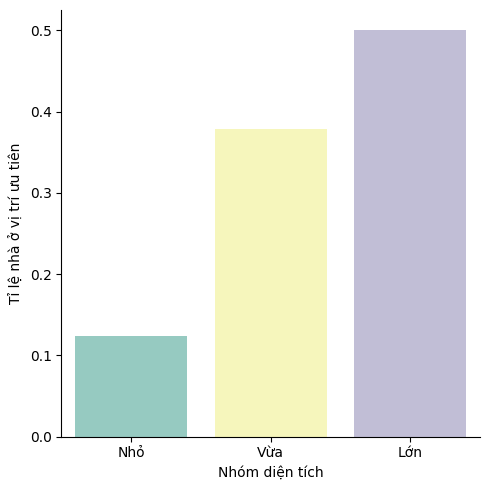

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Tính trung bình diện tích
average_area = data['area'].mean()
# Chia nhóm dữ liệu diện tích nhà thành 3 phần
data['area_group'] = pd.cut(data['area'], bins=[0, average_area, 2*average_area, data['area'].max()], labels=['Small', 'Medium', 'Large'])
# Tinh chỉnh dữ liệu
sub2 = data[(data['area_group'] == "Small") & (data['prefarea'] == 'yes')]
sub4 = data[(data['area_group'] == "Medium") & (data['prefarea'] == 'yes')]
sub6 = data[(data['area_group'] == "Large") & (data['prefarea'] == 'yes')]
# Tính tỉ lệ nhà ở vị trí ưu tiên trong từng nhóm diện tích
total_small = len(data[data['area_group'] == "Small"])
total_medium = len(data[data['area_group'] == "Medium"])
total_large = len(data[data['area_group'] == "Large"])
pref_small = len(sub2)
pref_medium = len(sub4)
pref_large = len(sub6)
# Tính tỉ lệ
pref_area_ratios = [pref_small/total_small, pref_medium/total_medium, pref_large/total_large]
# Tạo DataFrame cho dữ liệu biểu đồ
df = pd.DataFrame({'Nhóm diện tích': ['Nhỏ', 'Vừa', 'Lớn'], 'Tỉ lệ nhà ở vị trí ưu tiên': pref_area_ratios})
# Vẽ biểu đồ
sns.catplot(x="Nhóm diện tích", y="Tỉ lệ nhà ở vị trí ưu tiên", data=df, kind="bar", palette="Set3")
plt.xlabel('Nhóm diện tích')
plt.ylabel('Tỉ lệ nhà ở vị trí ưu tiên')
plt.tight_layout()
plt.show()

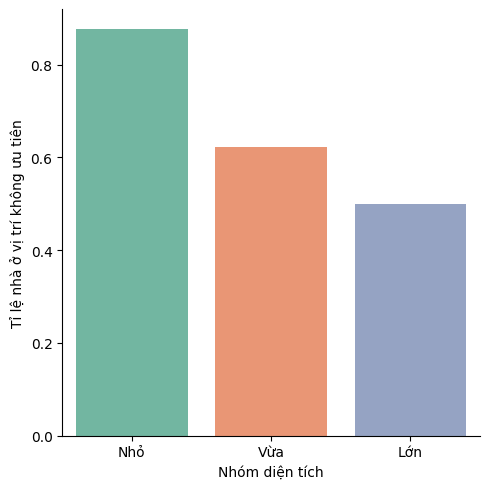

In [8]:
# Tính trung bình diện tích
average_area = data['area'].mean()
# Chia nhóm dữ liệu diện tích nhà thành 3 phần
data['area_group'] = pd.cut(data['area'], bins=[0, average_area, 2*average_area, data['area'].max()], labels=['Small', 'Medium', 'Large'])
# Tinh chỉnh dữ liệu
sub3 = data[(data['area_group'] == "Small") & (data['prefarea'] == 'no')]
sub5 = data[(data['area_group'] == "Medium") & (data['prefarea'] == 'no')]
sub7 = data[(data['area_group'] == "Large") & (data['prefarea'] == 'no')]
# Tính tỉ lệ nhà ở vị trí không ưu tiên trong từng nhóm diện tích
total_small = len(data[data['area_group'] == "Small"])
total_medium = len(data[data['area_group'] == "Medium"])
total_large = len(data[data['area_group'] == "Large"])
non_pref_small = len(sub3)
non_pref_medium = len(sub5)
non_pref_large = len(sub7)
# Tính tỉ lệ
non_pref_area_ratios = [non_pref_small/total_small, non_pref_medium/total_medium, non_pref_large/total_large]
# Tạo DataFrame cho dữ liệu biểu đồ
df = pd.DataFrame({'Nhóm diện tích': ['Nhỏ', 'Vừa', 'Lớn'], 'Tỉ lệ nhà ở vị trí không ưu tiên': non_pref_area_ratios})
# Vẽ biểu đồ bằng seaborn catplot
sns.catplot(x="Nhóm diện tích", y="Tỉ lệ nhà ở vị trí không ưu tiên", data=df, kind="bar", palette="Set2")
plt.xlabel('Nhóm diện tích')
plt.ylabel('Tỉ lệ nhà ở vị trí không ưu tiên')
plt.show()

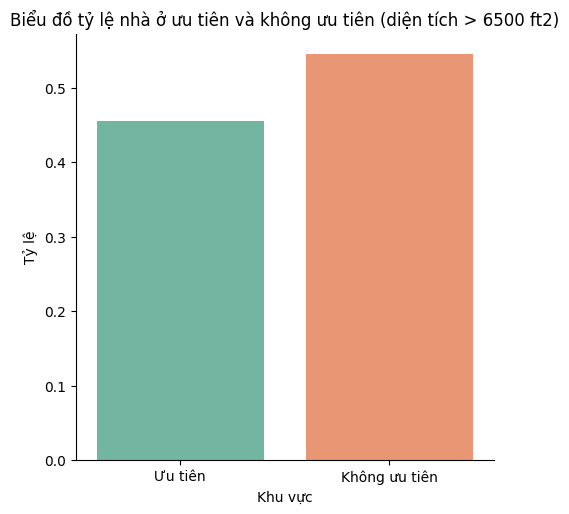

In [10]:
# Tinh chỉnh dữ liệu diện tích lớn hơn 6500 ft2
filtered_data = data[data['area'] > 6500]
# Tính tỷ lệ nhà ở vị trí ưu tiên và không ưu tiên
total_count = len(filtered_data)
prefarea_count = len(filtered_data[filtered_data['prefarea'] == 'yes'])
non_prefarea_count = len(filtered_data[filtered_data['prefarea'] == 'no'])
prefarea_ratio = prefarea_count / total_count
non_prefarea_ratio = non_prefarea_count / total_count
# Tạo DataFrame cho dữ liệu biểu đồ
df = pd.DataFrame({'Khu vực': ['Ưu tiên', 'Không ưu tiên'], 'Tỷ lệ': [prefarea_ratio, non_prefarea_ratio]})
# Vẽ biểu đồ
sns.catplot(x="Khu vực", y="Tỷ lệ", data=df, kind="bar", palette="Set2")
plt.xlabel('Khu vực')
plt.ylabel('Tỷ lệ')
plt.title('Biểu đồ tỷ lệ nhà ở ưu tiên và không ưu tiên (diện tích > 6500 ft2)')
plt.show()